In [127]:
import sys, numpy as np
sys.path.append('/Users/mikewu/Desktop/Research/persist-homology/')
import sub_parse
reload(sub_parse)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [152]:
name = '/Users/mikewu/Desktop/Research/persist-homology/saved_states/large_sub_set_test/results-'
norm = 'False'
base = '0.1'
paths = [name+str(i)+'-'+base+'baseNorm'+norm+'.txt' for i in range(1, 101)]
singles = ['all-silh', 'euler', 'all-euler', 'silh-euler']
doubles = ['indiv_silh', 'indiv-euler', 'contour']

resArr = np.array([sub_parse.parse(f) for f in paths])

bighash = {}
for characteristic in singles:
    bighash[characteristic] = sub_parse.prepare1d(resArr, characteristic)
    
for characteristic in doubles:
    for dim in [0,1,2]:
        bighash[characteristic+'-dim-'+str(dim)] = sub_parse.prepare2d(resArr, characteristic, dim)

def safelog10(B, noise=1e-5):
    B[B == 0] += noise
    return np.log10(B)

import rpy2.robjects as robjects
from rpy2.robjects.numpy2ri import numpy2ri
import numpy as np

def rds_to_np(Rfile):
    ''' Convert .RData to be able to load 
        the array into Python.

        Rfile := (str) location of file to 
        translate to Python.
    ''' 
    raw = robjects.r['readRDS'](Rfile)
    return raw

# bighash for CORR:
if norm == 'False':
    corr_data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/sub_output/voronoi_proba_norm(0).rds'))
    pi_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/sub_proba/nonorm/ans-voronoi-nodim.npy')
    wkc_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/sub_proba/nonorm/ans-voronoi-bydim.npy')
else:
    corr_data = np.array(rds_to_np('/Users/mikewu/Desktop/Research/persist-homology/correlation/sub_output/voronoi_proba_norm(1).rds'))   
    pi_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/sub_proba/yesnorm/ans-voronoi-nodim.npy')
    wkc_data = np.load('/Users/mikewu/Desktop/Research/persist-homology/intensity/output/sub_proba/yesnorm/ans-voronoi-bydim.npy')

corr_data = np.log10(np.exp(corr_data))
bighash_corr = {'corr': np.array(corr_data.T)}

# bighash for wik
wkc_0 = wkc_data[:, 0, :]
wkc_1 = wkc_data[:, 1, :]
wkc_2 = wkc_data[:, 2, :]
pi_all = pi_data
bighash_wik = {'wik_0': np.array(wkc_0.T),
               'wik_1': np.array(wkc_1.T),
               'wik_2': np.array(wkc_2.T),
               'pi': np.array(pi_data.T) }

In [158]:
def hard_line_plot(allkeys, 
                   allticks, 
                   allcolors,
                   bighash,
                   save_path=None):

    xvalues = np.arange(0.1, 0.35, 0.05)
    matplotlib.rc('xtick', labelsize=27) 
    matplotlib.rc('ytick', labelsize=27) 
    fig, ax = plt.subplots(figsize=(20,5))
    plt.ylabel('log10 p-value', fontsize=40)
    plt.xlabel('Percent filament', fontsize=40)

    for it in range(5):
        store_error_max = []
        store_error_min = []

        for k, c, t in zip(allkeys, allcolors, allticks):
            xvalue = xvalues[it]
            yvalue = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]][it]
            lower_error = [np.percentile(np.log10(np.exp(i)), 0) for i in bighash[k]]
            upper_error = [np.percentile(np.log10(np.exp(i)), 100) for i in bighash[k]]
            store_error_min.append(lower_error[it])
            store_error_max.append(upper_error[it])

        store_error_min = np.array(store_error_min)
        store_error_max = np.array(store_error_max)

        for k, c, t in zip(allkeys, allcolors, allticks):
            xvalue = xvalues[it]
            yvalue = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]][it]

            lower_error = [np.percentile(np.log10(np.exp(i)), 0) for i in bighash[k]]
            upper_error = [np.percentile(np.log10(np.exp(i)), 100) for i in bighash[k]]

            pos = [xvalue]
            ypt = [yvalue]
            err = [[lower_error[it]], [upper_error[it]]]
            plt.errorbar(pos, 
                         ypt, 
                         yerr=err, 
                         lw=6, 
                         alpha=0.4,
                         color=c, 
                         capsize=20, 
                         capthick=6)

    for k, c, t in zip(allkeys, allcolors, allticks):
        yvalues = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]]    

        plt.plot(xvalues,
             yvalues,
             color=c,
             alpha=0.5,
             lw=5)

    for k, c, t in zip(allkeys, allcolors, allticks):
        yvalues = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]]
        plt.scatter(xvalues,
                    yvalues,
                    color=c,
                    marker='o',
                    alpha=1,
                    s=300)

    # put it here so dots are the legend
    plt.legend(allticks, fontsize=30, loc='lower left')    

    ax.xaxis.grid(False)
    plt.tick_params(axis='both', which='major', labelsize=35)
    plt.tight_layout()
    plt.xlim(0.04, 0.31)
    
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

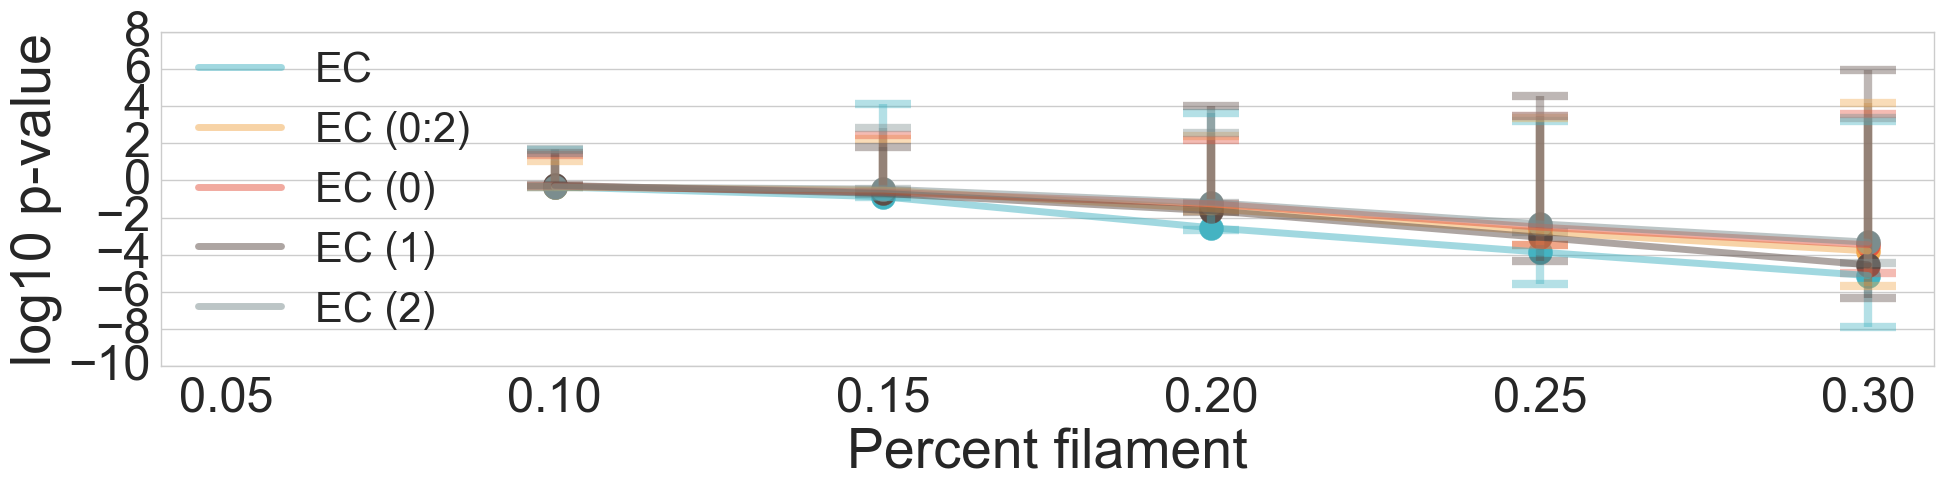

In [159]:
allkeys = ['euler', 'all-euler', 'indiv-euler-dim-0', 'indiv-euler-dim-1', 'indiv-euler-dim-2']
allticks = ['EC', 'EC (0:2)', 'EC (0)', 'EC (1)', 'EC (2)']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']
hard_line_plot(allkeys, allticks, allcolors, bighash)

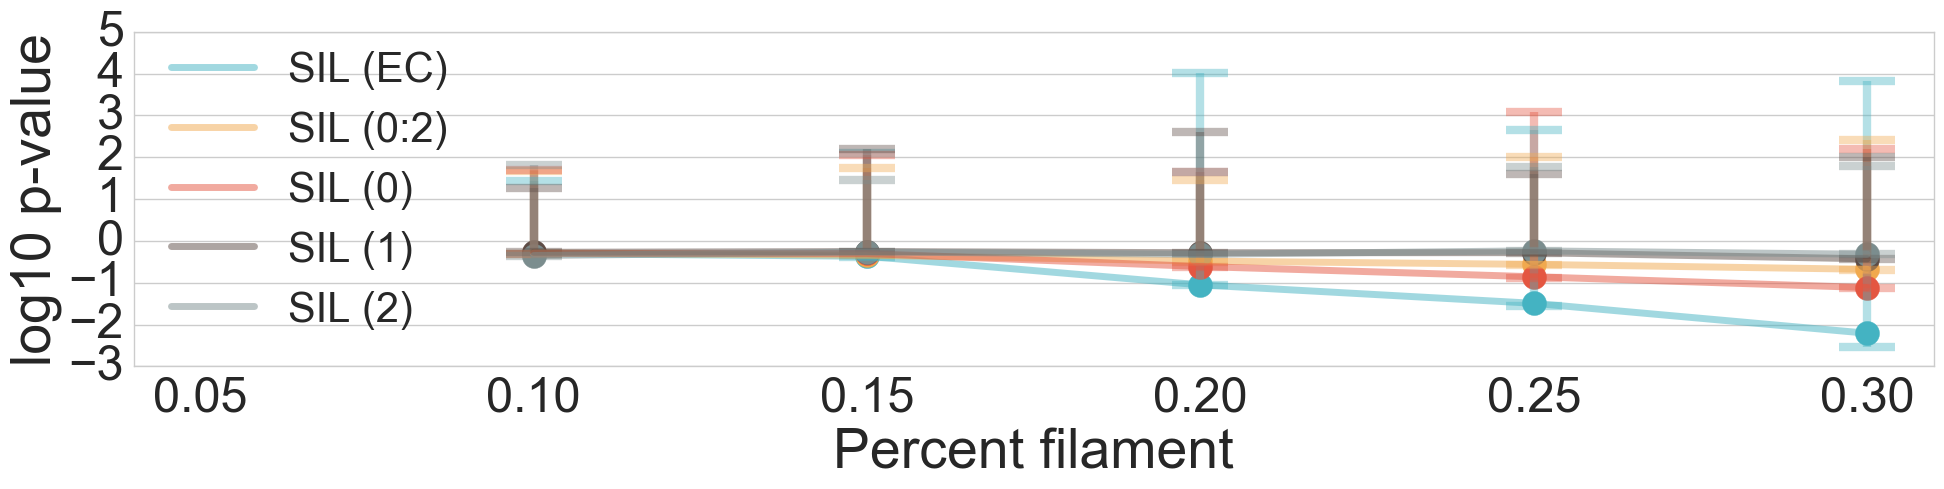

In [160]:
allkeys = ['silh-euler', 'all-silh', 'indiv_silh-dim-0', 'indiv_silh-dim-1', 'indiv_silh-dim-2']
allticks = ['SIL (EC)', 'SIL (0:2)', 'SIL (0)', 'SIL (1)', 'SIL (2)']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']
hard_line_plot(allkeys, allticks, allcolors, bighash)

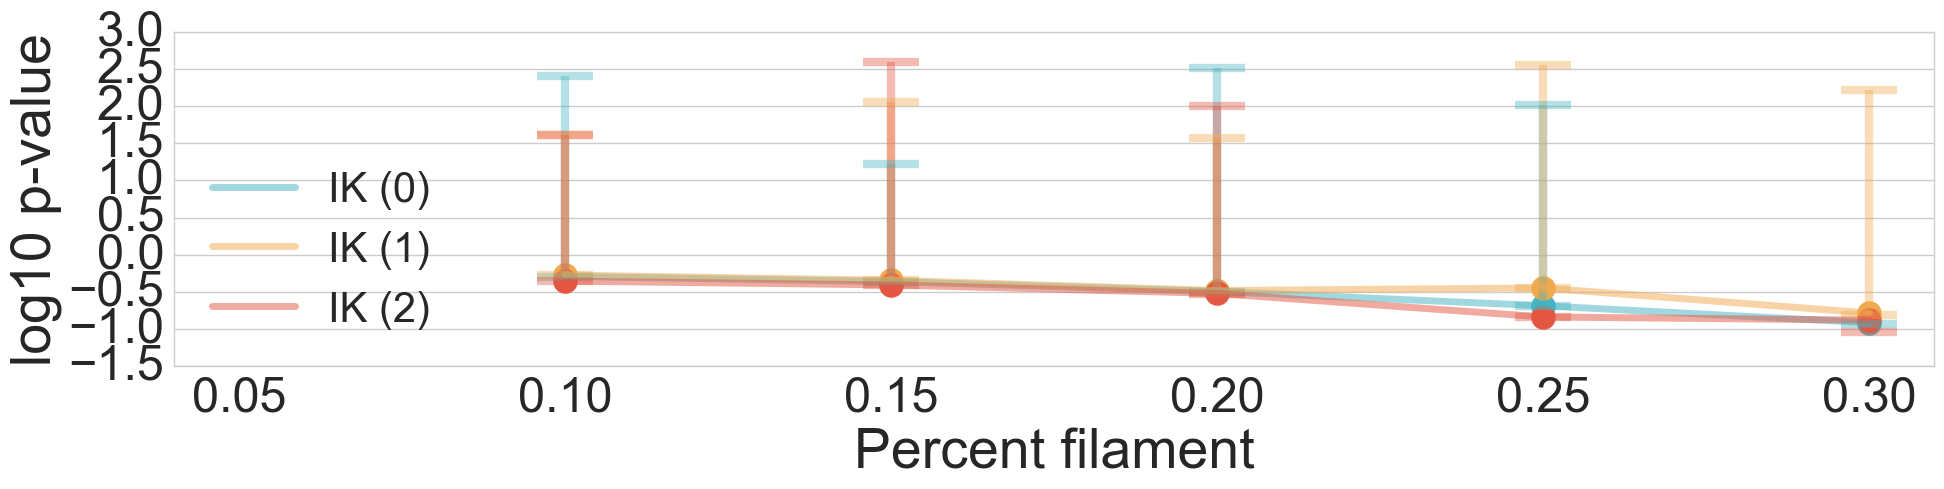

In [161]:
allkeys = ['contour-dim-0', 'contour-dim-1', 'contour-dim-2']
allticks = ['IK (0)', 'IK (1)', 'IK (2)']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']
hard_line_plot(allkeys, allticks, allcolors, bighash)

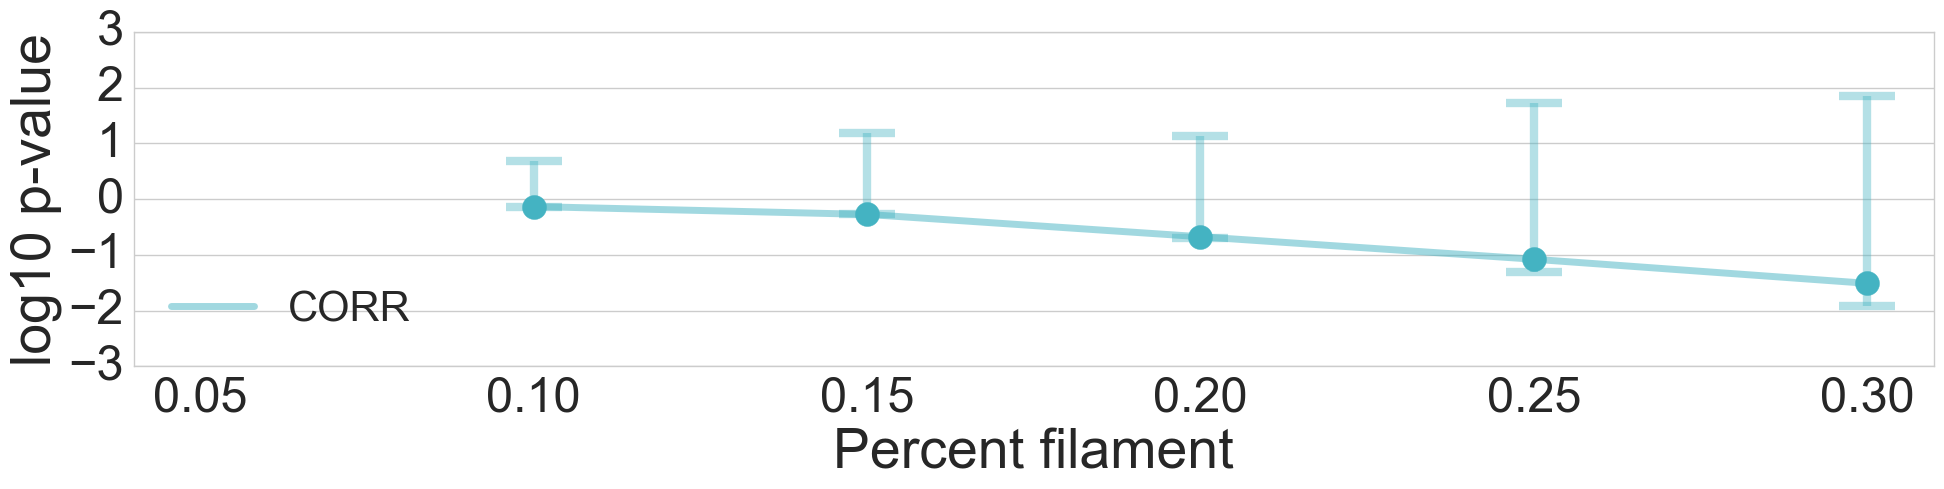

In [162]:
allkeys = ['corr']
allticks = ['CORR']
allcolors = ['#44B3C2']
hard_line_plot(allkeys, allticks, allcolors, bighash_corr)

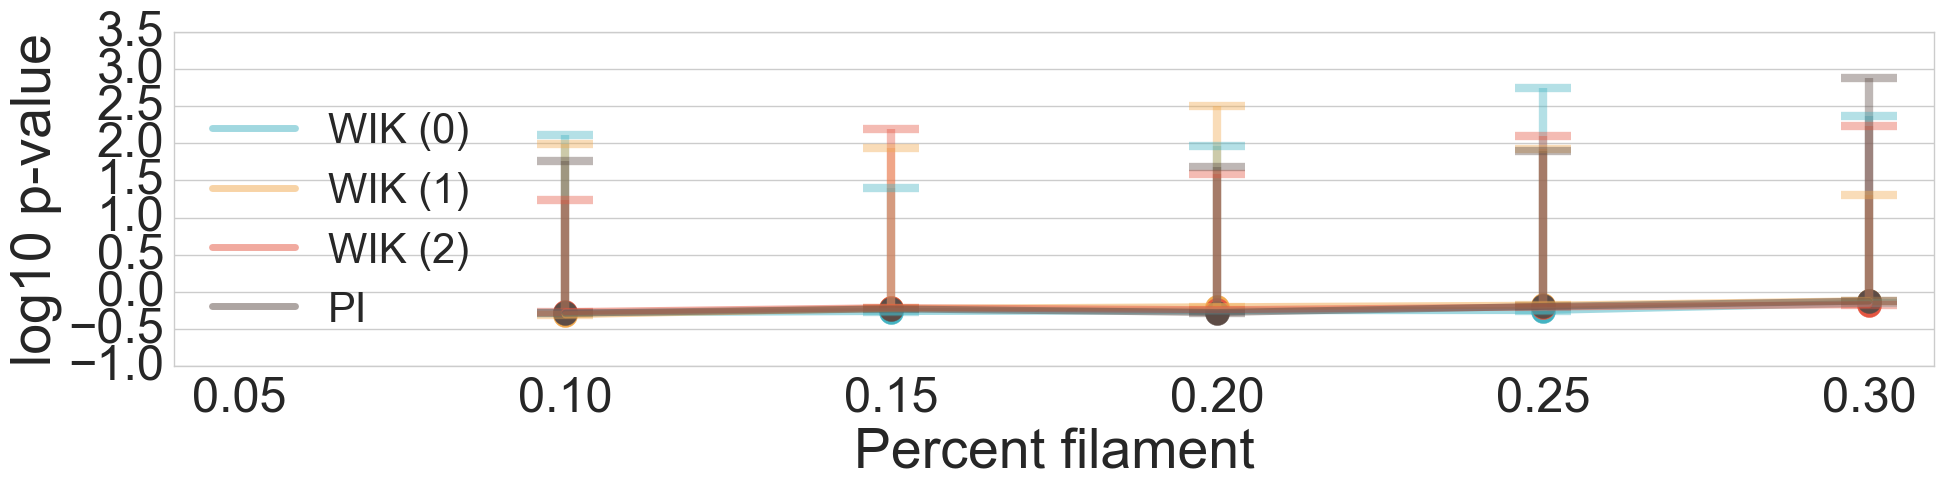

In [163]:
allkeys = ['wik_0', 'wik_1', 'wik_2', 'pi']
allticks = ['WIK (0)', 'WIK (1)', 'WIK (2)', 'PI']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46']
hard_line_plot(allkeys, allticks, allcolors, bighash_wik)